# Web development using Flask - Graded Project - Solution

### Context:
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 

### Objective:
- 1) This is a standard supervised classification task. A classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s).

- 2) To build a Python Flask ML application where a user have to sign up by entering the username and password and login to the website and then enter their details to check whether the loan application will get approved or not.

### Dataset Information:

#### Dataset Source: https://www.kaggle.com/datasets/ssiddharth408/loan-prediction-dataset

- **Loan_ID**: Unique Loan ID
- **Gender**: Male/ Female
- **Married**: Applicant married (Y/N)
- **Dependents**: Number of dependents
- **Education**: Applicant Education (Graduate/ Under Graduate)
- **Self_Employed**: Self employed (Y/N)
- **ApplicantIncome**: Applicant income (in dollars)
- **CoapplicantIncome**: Coapplicant income (in dollars)
- **LoanAmount**: Loan amount in thousands (in dollars)
- **Loan_Amount_Term**: Term of loan in months
- **Credit_History**: credit history meets guidelines
- **Property_Area**: Urban/ Semi Urban/ Rural
- **Loan_Status (Target)**: Loan approved (Y/N)

### Model Building and Pickling

### 1. Import required libraries and read the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import sklearn
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# If using Google Colab

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/loan_approval_data.csv')
df.head()

Mounted at /content/drive


,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [3]:
#df = pd.read_csv('loan_approval_data.csv')
#df.head()

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [4]:
## check the shape 
df.shape

(614, 13)

In [5]:
## check basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


### 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features.

In [6]:
## checking percentage of the missing values.
df.isnull().sum()/len(df)*100

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

- We can observe that there are missing values in some columns, the percentage of the missing values are less than 10%, for now I am dropping the missing values from the dataset(we can also impute them).

In [7]:
## dropping missing values
df.dropna(inplace=True)

In [8]:
## recheck the missing values
df.isnull().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [9]:
## dropping redundant columns
df.drop('loan_id',axis=1,inplace=True)

In [10]:
df.head(2)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y


### 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations.

In [11]:
## storing the categorical column seperatly
cat_columns = df[['gender', 'married', 'education', 'self_employed', 'property_area']]

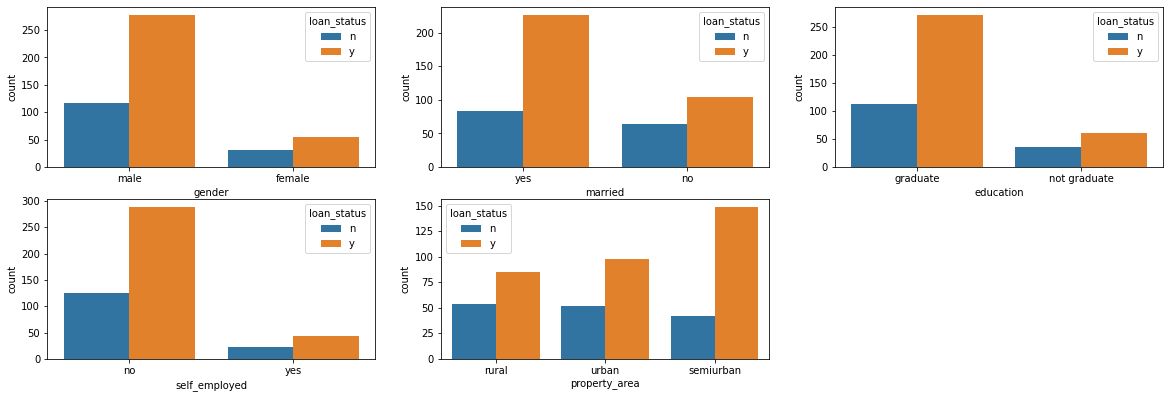

In [12]:
i = 1
plt.figure(figsize = (20,10))
for feature in cat_columns:
    plt.subplot(3,3,i)
    sns.countplot(x = feature,hue = 'loan_status' , data = df)
    i +=1

From the above plots we can observe that:
- There is higher probability for males for loan status being yes than that of females.
- Married and graduate people have the upperhand in getting the loan approved.
- Non self-employed have upperhand in getting the loan approved than that of self employed.
- The people live in semiurban area have the higher probability of getting the loan that of the urban and rural.

### 5. Encode the categorical data.

In [13]:
## first we will manual encode the target column.
## 'y': 1 and 'n':0
df['loan_status'] = df['loan_status'].replace({'y':1,'n':0})

In [14]:
df['loan_status'].unique()

array([0, 1])

In [15]:
## now lets encode other independent categorical variables.

In [16]:
## Encoding independent categoricals variables manually (can also be done through one_hot_encoder or label encoder)
df['gender'] = df['gender'].replace({'male':1, 'female':0})
df['married'] = df['married'].replace({'yes':1,'no':0})
df['self_employed'] = df['self_employed'].replace({'yes':1,'no':0})
df['property_area'] = df['property_area'].replace({'rural':0,'urban':1, 'semiurban':2})
df['education'] = df['education'].replace({'graduate':1, 'not graduate':0})

In [17]:
## lets check few rows after encoding
df.head(2)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1,1


### 6. Separate the target and independent features and split the data into train and test.

In [18]:
## separate target and independent variables
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [19]:
df['loan_status'].value_counts(normalize=True)*100

1    69.166667
0    30.833333
Name: loan_status, dtype: float64

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(336, 11) (144, 11)
(336,) (144,)


### 7. Build any classification model to predict the loan status of the customer and save your model using pickle.

In [22]:
## Let us build simple Adaptive Boosting classifier model
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)

AdaBoostClassifier()

In [23]:
## Let us check the accuracy to see hows our model is performing

y_train_pred = ab.predict(X_train)
y_test_pred = ab.predict(X_test)

accuracy_train = accuracy_score(y_train,y_train_pred)
accuracy_test = accuracy_score(y_test,y_test_pred)

print('accuracy train:',accuracy_train)
print('accuarcy test',accuracy_test)

accuracy train: 0.875
accuarcy test 0.7222222222222222


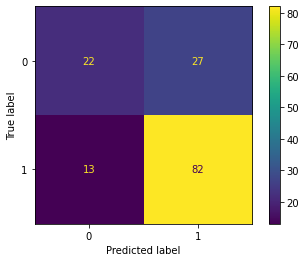

In [24]:
## Confusion matrix using test data
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(ab, X_test, y_test)  
plt.show()

#### NOTE:
- As we can observe the model is overfitting. (due to imbalance in the target class)
- We can further improve the model by building tuning the hyperparameters.

### Pickling - Creating a pickle file with an extension as .pkl

In [25]:
import pickle
# Saving model to disk
pickle.dump(ab, open('model.pkl','wb'))

### Buidling a Machine Learning application using Python Flask Framework.

#### Now open a `new folder/new project` in `visual studio/pycharm` that should contain the `"Templates"`, `"Static"` folder and the `"model.pkl"` file *make sure you are using a virutal environment and install required packages.*

In [ ]:
### For the Flask application, kindly refer to the source code

-------
## Happy Learning:)
-----